In [1]:
import pandas as pd
from functions import check_nan
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Imported the necessary libraries and functions. Also stated that I want both the columns and rows to be shown fully. 

In [2]:
categories_ori = pd.read_csv('../data/original/category.csv')
categories_ori.shape

(16, 3)

Importing the file and checking the original shape before I start cleaning. 

In [3]:
categories=categories_ori.copy()
categories.head()

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


Created a copy of the file. This is where I will do all the cleaning for security reasons and also so I can compare the original size with the size of the file I will be working on. 

In [4]:
categories.columns

Index(['category_id', 'name', 'last_update'], dtype='object')

I will rename 'name' column to 'category_name'

In [5]:
categories.rename(columns={'name':'category_name'}, inplace=True)


In [6]:
categories.columns = [c.lower().replace(" ", "_") for c in categories.columns]


Made sure there are no unnecessary spaces in the column names. 

'N nan cols: 0'

Series([], dtype: float64)

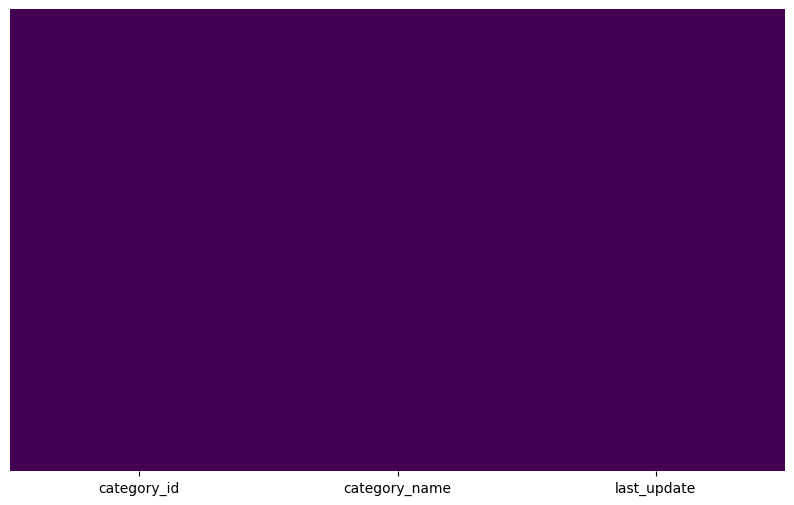

In [7]:
check_nan(categories)

Checking null values. There are no null values in this dataset 

In [8]:
categories.duplicated().any()

False

There are no duplicated rows in this dataset. 

In [9]:
categories[['category_id']].sort_values(by='category_id', ascending=True).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
category_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16


Made sure category_id values are unique and in ascending order. This way I know I can use them as primary keys later in mySQL. 

In [10]:
categories.category_name.value_counts()

Action         1
Animation      1
Children       1
Classics       1
Comedy         1
Documentary    1
Drama          1
Family         1
Foreign        1
Games          1
Horror         1
Music          1
New            1
Sci-Fi         1
Sports         1
Travel         1
Name: category_name, dtype: int64

Made sure formatting is consistent across the column category_name. I do however prefer to have the category names in caps so I will change that. 

In [11]:
categories.category_name=categories.category_name.apply(lambda x: x.upper())

In [12]:
categories.last_update.unique()

array(['2006-02-15 04:46:27'], dtype=object)

Column last_update is a constant column. There is only 1 unique value in all the rows. I will drop it since it has no utility. 

In [13]:
categories.drop(columns=["last_update"], inplace=True)

In [14]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    16 non-null     int64 
 1   category_name  16 non-null     object
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


In [15]:
for c in categories.select_dtypes(include="integer"):
    
    categories[c]=pd.to_numeric(categories[c], downcast="integer")

In [16]:
for c in categories.select_dtypes(include="object"):
    
    categories[c] = categories[c].astype("category")

Downgrading integers and changing objects to category to improve memory usage. 

In [17]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   category_id    16 non-null     int8    
 1   category_name  16 non-null     category
dtypes: category(1), int8(1)
memory usage: 848.0 bytes


In [19]:
print("the original shape was:", categories_ori.shape, "the shape now is:" , categories.shape)

the original shape was: (16, 3) the shape now is: (16, 2)


In [18]:
categories.to_csv("../data/cleaned/categories_clean.csv", index=False)


Saved cleaned file